In [ ]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Importing necessary libraries

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

In [ ]:
# loading the dataset
data = pd.read_csv("/content/used_phone_data.csv")

In [ ]:
# View top 5 rows of the data
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


In [ ]:
#sample data
data.sample(n=5, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
2501,Samsung,Android,13.49,yes,no,13.0,13.0,32.0,4.00,3600.0,181.0,2017,683,198.68,79.47
2782,Sony,Android,13.81,yes,no,NaN,8.0,32.0,4.00,3300.0,156.0,2019,195,198.15,149.10
605,Others,Android,12.70,yes,no,8.0,5.0,16.0,4.00,2400.0,137.0,2015,1048,161.47,48.39
2923,Vivo,Android,19.37,yes,no,13.0,16.0,64.0,4.00,3260.0,149.3,2019,375,211.88,138.31
941,Others,Others,5.72,no,no,0.3,0.3,32.0,0.25,820.0,90.0,2013,883,29.81,8.92


In [ ]:
data.shape

(3571, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


In [ ]:
df = data.copy()

In [ ]:
# Converting object data types to category
category_col = df.select_dtypes(exclude=np.number).columns.tolist()
df[category_col] = df[category_col].astype("category")

In [ ]:
df.dtypes

brand_name          category
os                  category
screen_size          float64
4g                  category
5g                  category
main_camera_mp       float64
selfie_camera_mp     float64
int_memory           float64
ram                  float64
battery              float64
weight               float64
release_year           int64
days_used              int64
new_price            float64
used_price           float64
dtype: object

In [ ]:
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.0,NaN,NaN,NaN,14.803892,5.153092,2.7,12.7,13.49,16.51,46.36
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3391.0,NaN,NaN,NaN,9.400454,4.818396,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3569.0,NaN,NaN,NaN,6.547352,6.879359,0.3,2.0,5.0,8.0,32.0
int_memory,3561.0,NaN,NaN,NaN,54.532607,84.696246,0.005,16.0,32.0,64.0,1024.0
ram,3561.0,NaN,NaN,NaN,4.056962,1.391844,0.03,4.0,4.0,4.0,16.0
battery,3565.0,NaN,NaN,NaN,3067.225666,1364.206665,80.0,2100.0,3000.0,4000.0,12000.0


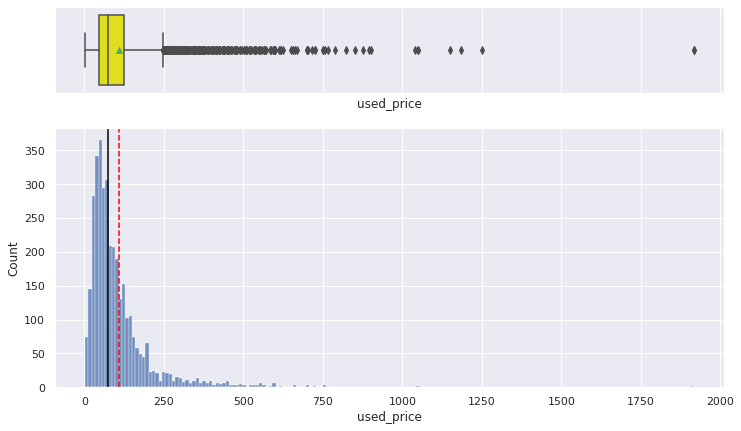

In [ ]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="purple"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
histogram_boxplot(df, "used_price")

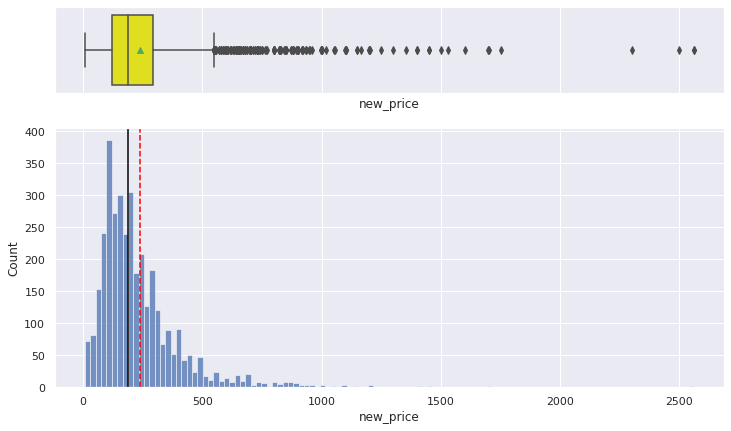

In [ ]:
histogram_boxplot(df, "new_price")

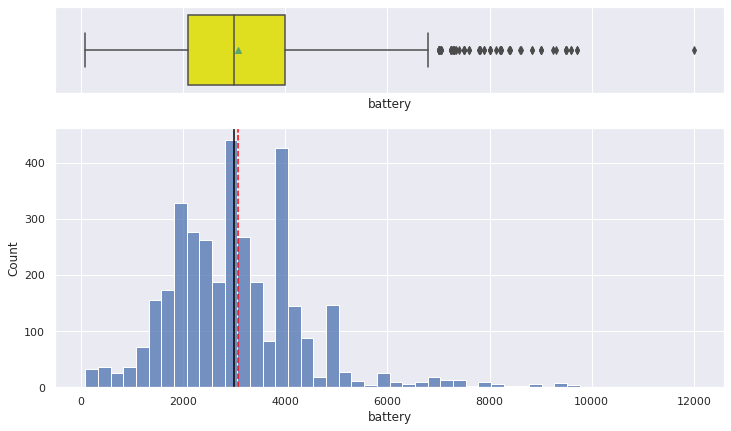

In [ ]:
histogram_boxplot(df, "battery")

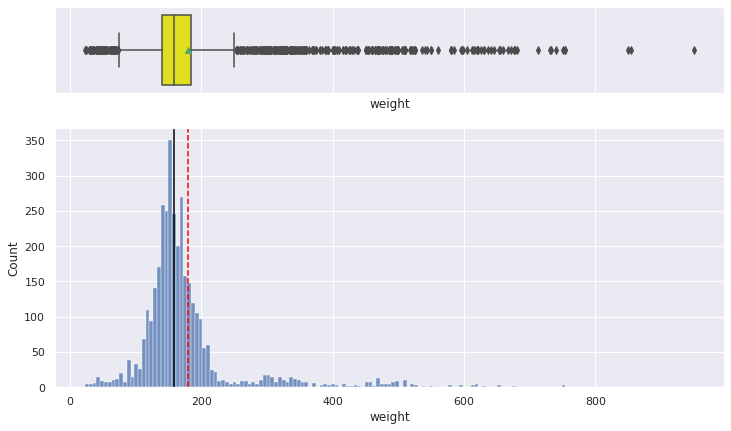

In [ ]:
histogram_boxplot(df, "weight")

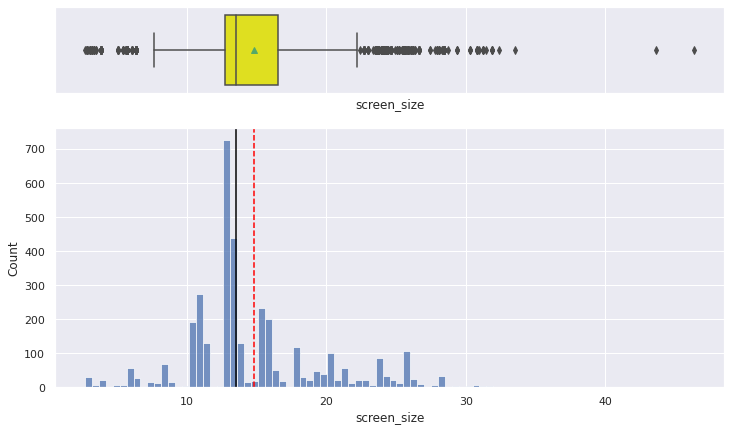

In [ ]:
histogram_boxplot(df, "screen_size")

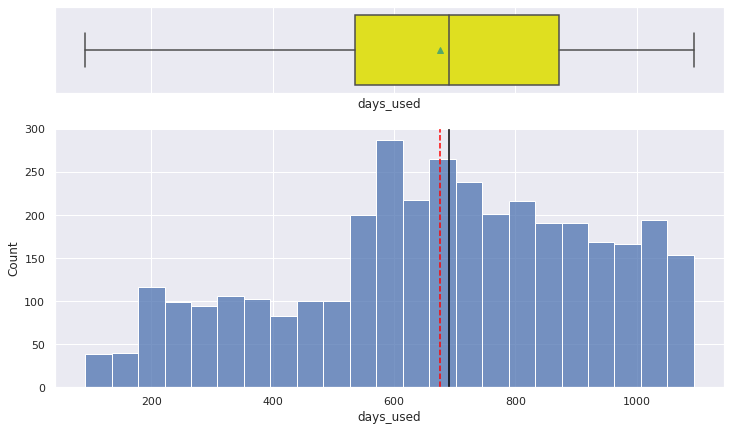

In [ ]:
histogram_boxplot(df, "days_used")

In [ ]:
# function to create labeled barplots for categorical and numerical variables

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

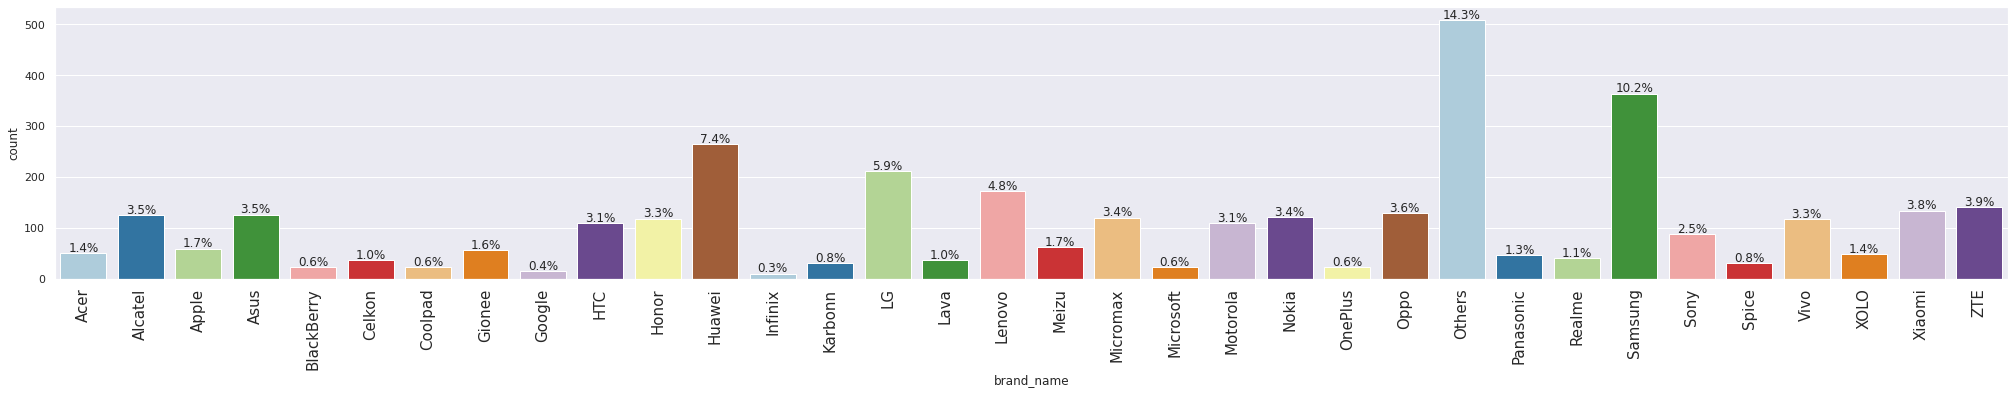

In [ ]:
# Plot barplot of brand_name with percentage showing on each bar
labeled_barplot(df, "brand_name", perc=True)

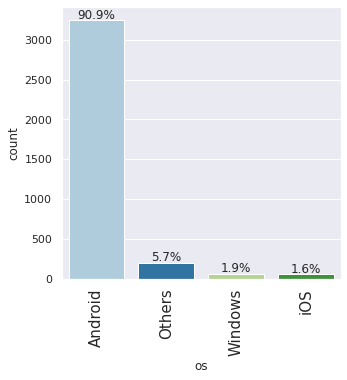

In [ ]:
labeled_barplot(df, "os", perc=True)

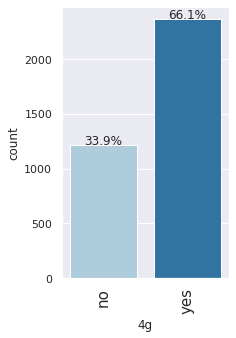

In [ ]:
labeled_barplot(df, "4g", perc=True)

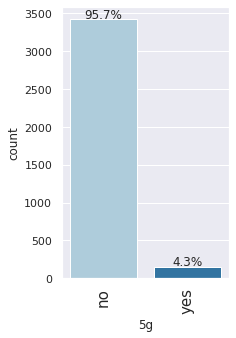

In [ ]:
labeled_barplot(df, "5g", perc=True)

In [ ]:
df["ram"].nunique()

14

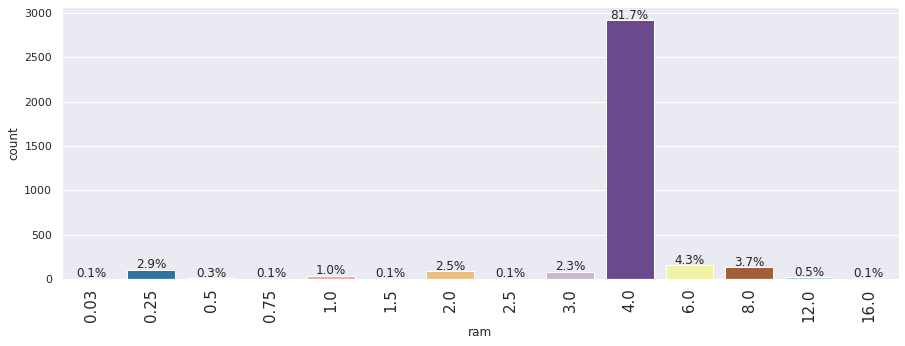

In [ ]:
labeled_barplot(df, "ram", perc=True)

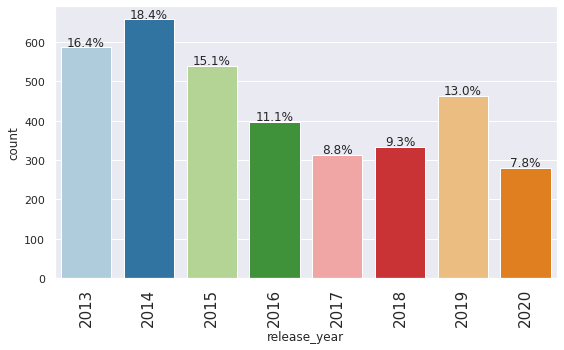

In [ ]:
labeled_barplot(df, "release_year", perc=True)

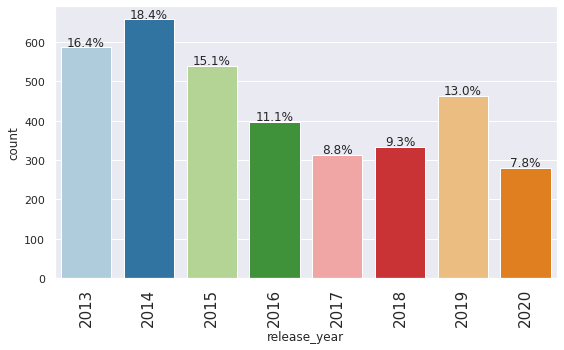

In [ ]:
labeled_barplot(df, "release_year", perc=True)

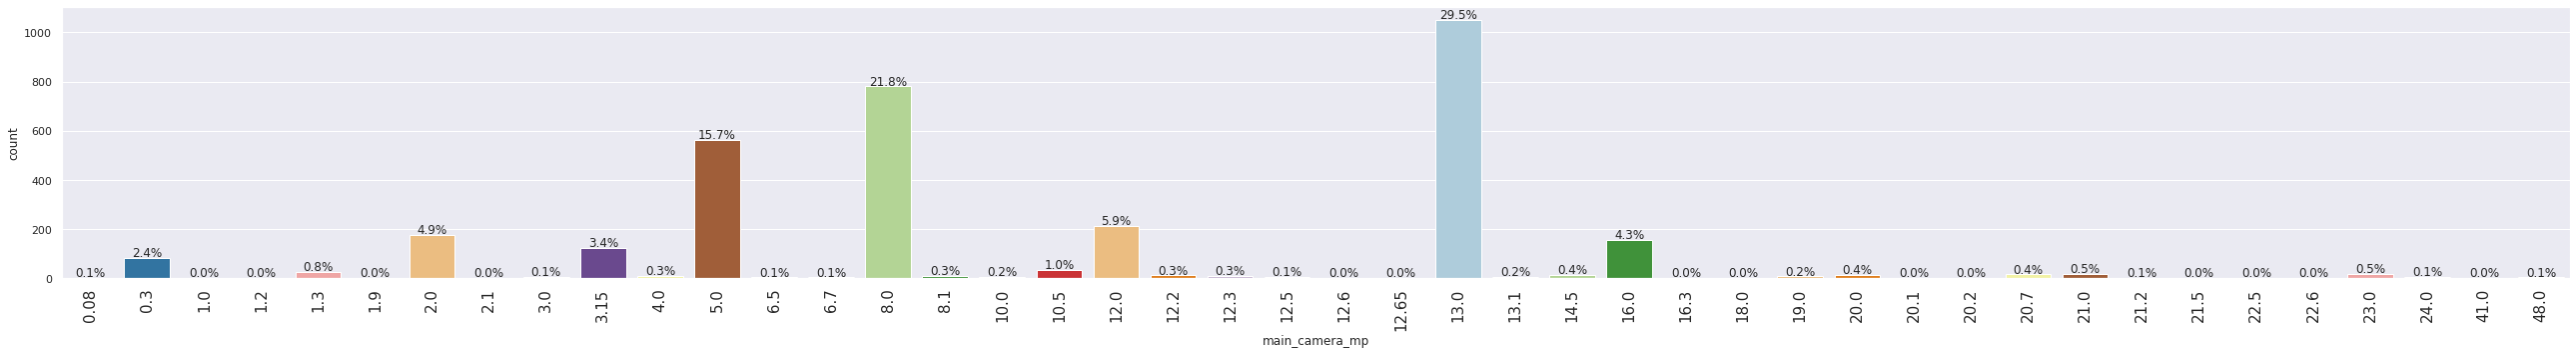

In [ ]:
labeled_barplot(df, "main_camera_mp", perc=True)

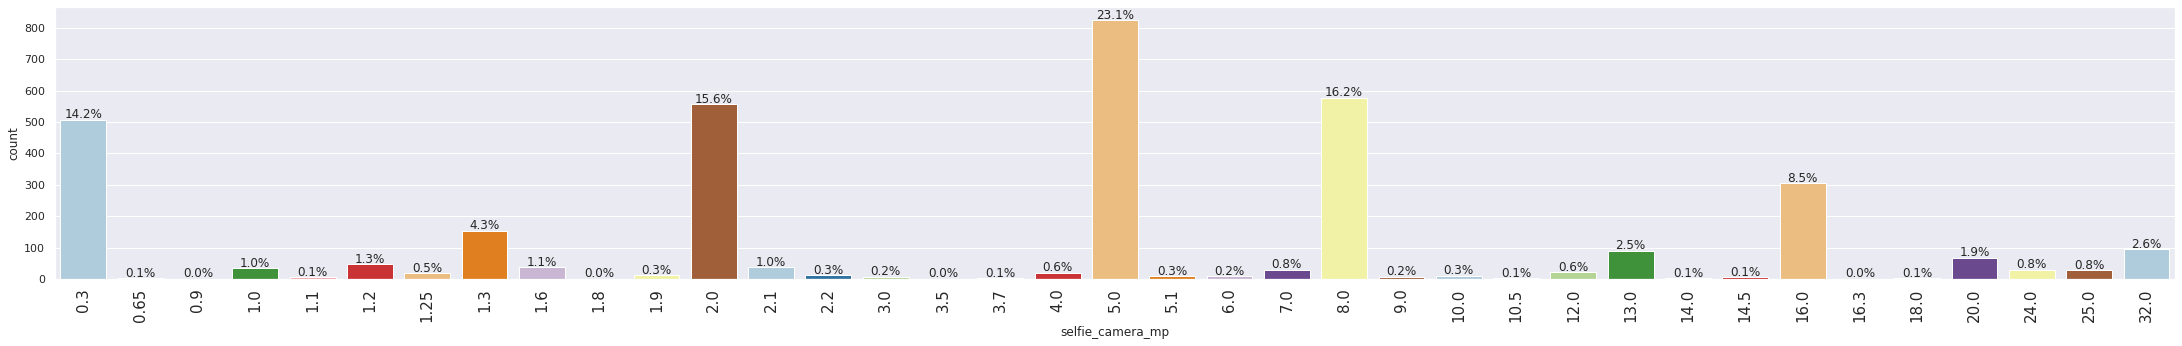

In [ ]:
labeled_barplot(df, "selfie_camera_mp", perc=True)

In [ ]:
df.groupby("brand_name")["ram"].mean()

brand_name
Acer          3.901961
Alcatel       3.426000
Apple         4.000000
Asus          4.047619
BlackBerry    3.829545
Celkon        1.466216
Coolpad       3.954545
Gionee        3.933036
Google        4.533333
HTC           4.000000
Honor         4.593220
Huawei        4.641326
Infinix       2.600000
Karbonn       3.375000
LG            3.893868
Lava          3.277778
Lenovo        3.886628
Meizu         4.451613
Micromax      3.750000
Microsoft     4.000000
Motorola      3.945455
Nokia         3.601351
OnePlus       6.363636
Oppo          4.961240
Others        3.751041
Panasonic     4.000000
Realme        4.195122
Samsung       4.159341
Sony          4.068182
Spice         3.750000
Vivo          4.756410
XOLO          4.000000
Xiaomi        4.567164
ZTE           4.023050
Name: ram, dtype: float64

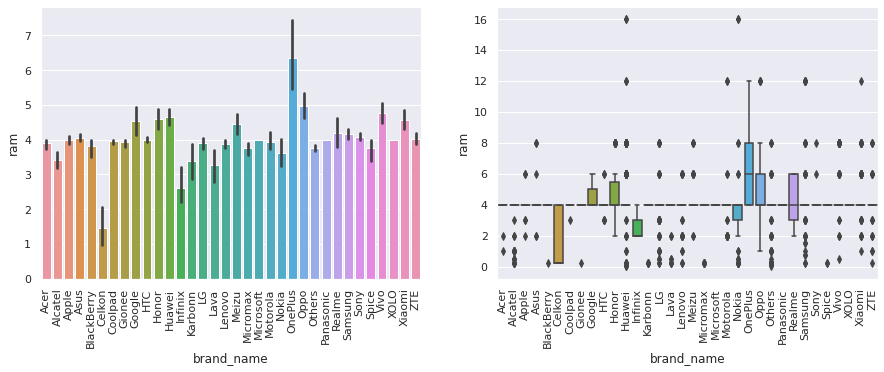

In [ ]:
# visual analysis of how the ram varies per brand
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, y="ram", x="brand_name")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="ram", x="brand_name")
plt.xticks(rotation=90)

plt.show()

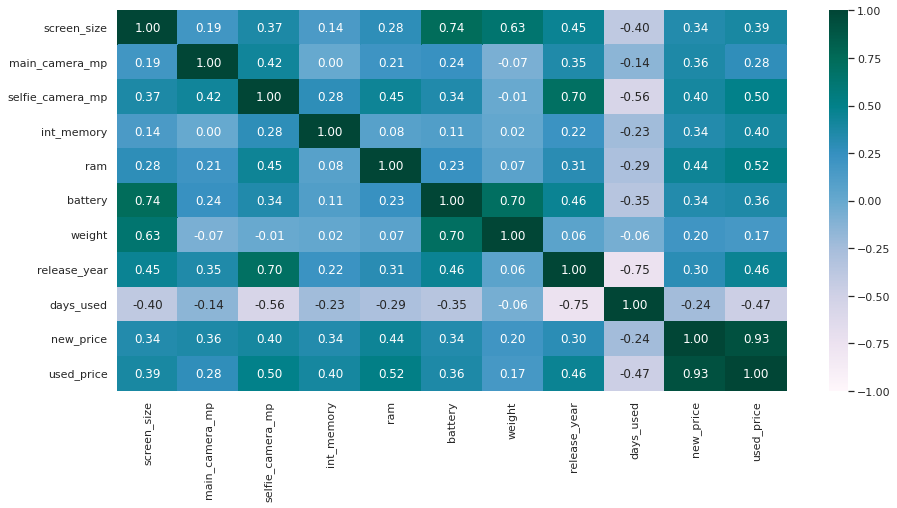

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="PuBuGn",
)
plt.show()

In [ ]:
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

In [ ]:
# fill missing columns with the column median
col_to_fill = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

df[col_to_fill] = df[col_to_fill].apply(lambda x: x.fillna(x.median()), axis=0)
# checking the number of missing values
df.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

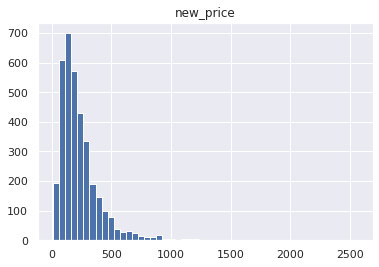

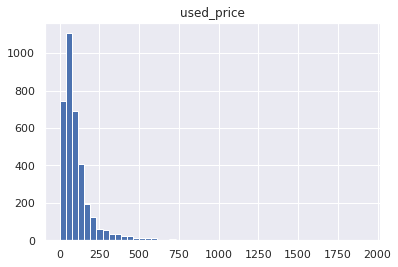

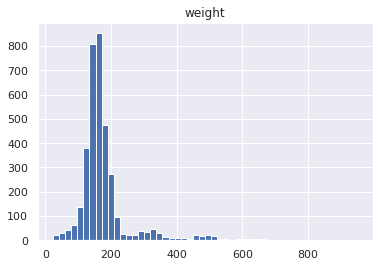

In [ ]:
# Plot of "new_price", "used_price" and "weight" before log transformation
cols_to_log = ["new_price", "used_price", "weight"]

for colname in cols_to_log:
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.show()

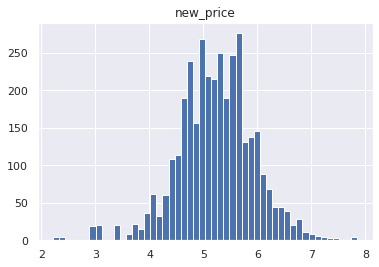

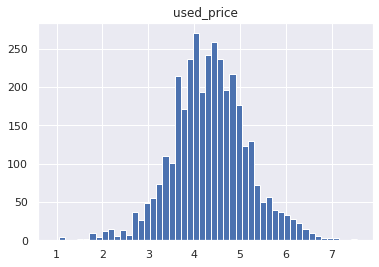

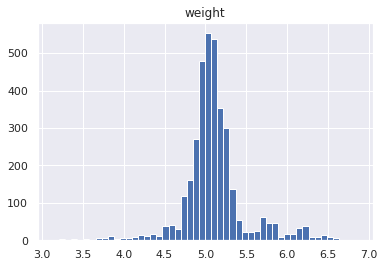

In [ ]:
# Log transformation
for colname in cols_to_log:
    df[colname + "_log"] = np.log(df[colname])

df.drop(cols_to_log, axis=1, inplace=True)  # drop previous price columns
# Plot of "new_price", "used_price" and "weight" after log transformation
for colname in cols_to_log:
    plt.hist(df[colname + "_log"], bins=50)
    plt.title(colname)
    plt.show()

In [ ]:
# Create dummy variables for the categorical variables
df1 = pd.get_dummies(df, columns=["brand_name", "os", "4g", "5g"], drop_first=True)
df1.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,new_price_log,used_price_log,weight_log,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,23.97,13.0,5.0,64.0,3.0,3020.0,2020,127,4.715100,4.465448,4.983607,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,28.10,13.0,16.0,128.0,8.0,4300.0,2020,325,5.519018,5.084443,5.361292,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,24.29,13.0,8.0,128.0,8.0,4200.0,2020,162,5.884631,5.593037,5.361292,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,26.04,13.0,8.0,64.0,6.0,7250.0,2020,345,5.630961,5.194234,6.173786,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,15.72,13.0,8.0,64.0,3.0,5000.0,2020,293,4.947837,4.642466,5.220356,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


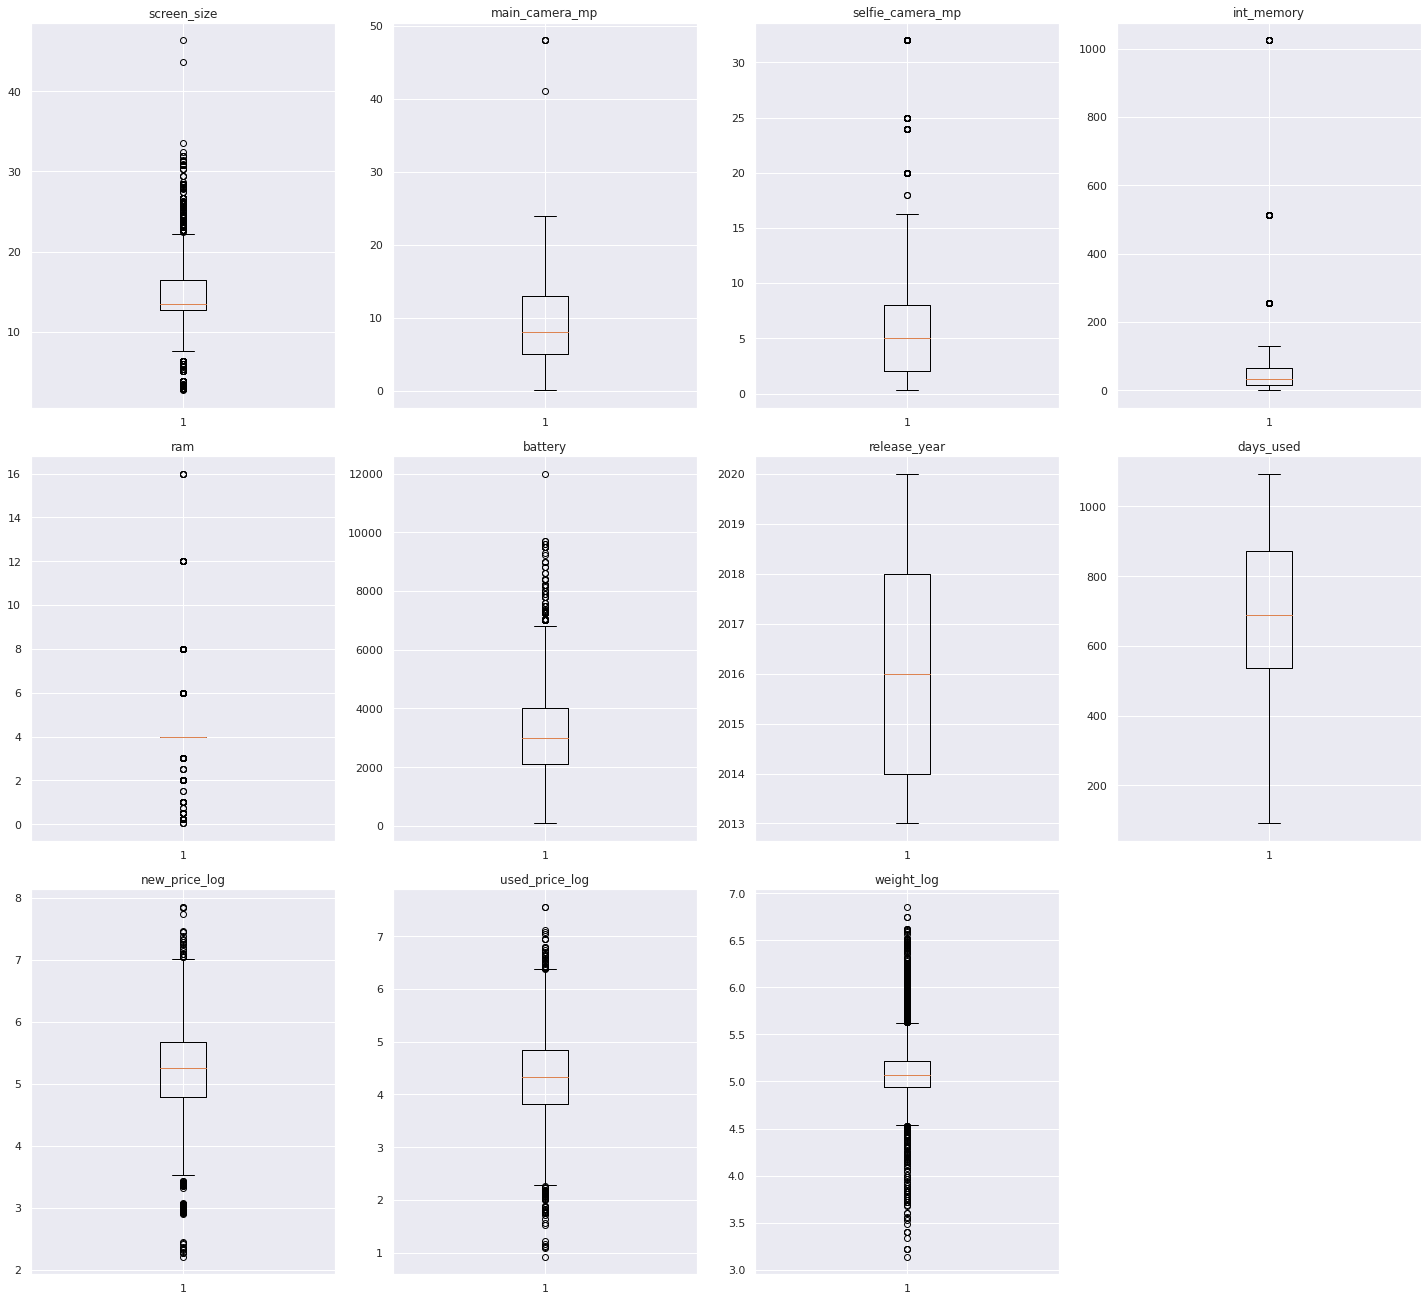

In [ ]:
# let's plot the boxplots of all numerical columns to check for outliers
plt.figure(figsize=(20, 30))

for i, var in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[var], whis=1.5)
    plt.tight_layout()
    plt.title(var)

plt.show()

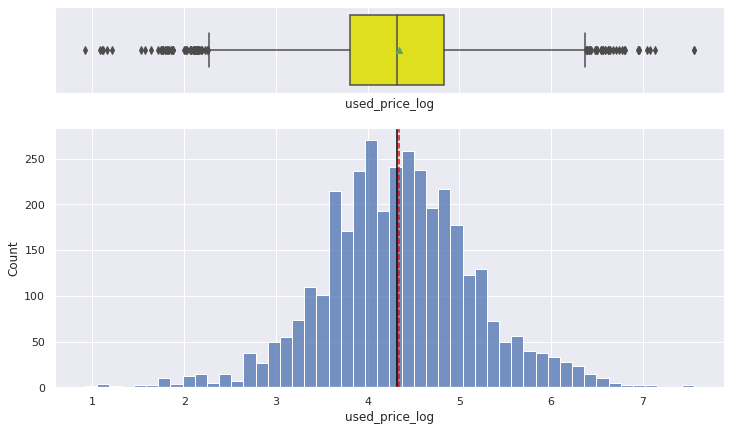

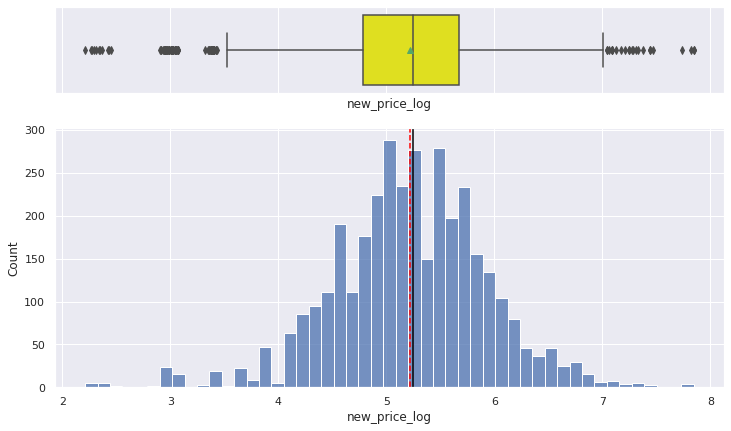

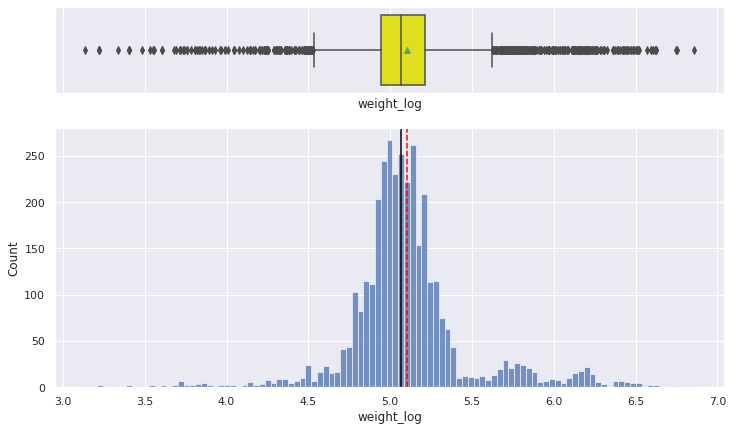

In [ ]:
for col in ["used_price_log", "new_price_log", "weight_log"]:
    histogram_boxplot(df, col)

In [ ]:
# defining X and y variables
X = df1.drop(["used_price_log"], axis=1)
y = df1["used_price_log"]
# view independent variables
X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,new_price_log,weight_log,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,23.97,13.0,5.0,64.0,3.0,3020.0,2020,127,4.715100,4.983607,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,28.10,13.0,16.0,128.0,8.0,4300.0,2020,325,5.519018,5.361292,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,24.29,13.0,8.0,128.0,8.0,4200.0,2020,162,5.884631,5.361292,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,26.04,13.0,8.0,64.0,6.0,7250.0,2020,345,5.630961,6.173786,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,15.72,13.0,8.0,64.0,3.0,5000.0,2020,293,4.947837,5.220356,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
y.head()

0    4.465448
1    5.084443
2    5.593037
3    5.194234
4    4.642466
Name: used_price_log, dtype: float64

In [ ]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

In [ ]:
# check shape of the train and test data
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2499
Number of rows in test data = 1072


In [ ]:
linearregression = LinearRegression()  # LinearRegression has been imported above
linearregression.fit(X_train, y_train)  # fit the dependent and independent train data

LinearRegression()

In [ ]:
# dataframe to show the model coefficients and intercept
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
screen_size,0.000290
main_camera_mp,0.000370
selfie_camera_mp,0.000721
int_memory,0.000017
ram,-0.000365
battery,0.000003
release_year,0.004150
days_used,-0.001110
new_price_log,0.994404
weight_log,-0.005661


In [ ]:
# function to compute adjusted R-squared

def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, X_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.082899,0.06852,0.990231,0.990039,1.697228


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, X_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.082181,0.070285,0.989854,0.989378,1.699362


In [ ]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
X_train1 = sm.add_constant(X_train)
# adding constant to the test data
X_test1 = sm.add_constant(X_test)

olsmod0 = sm.OLS(y_train, X_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5174.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:25:27   Log-Likelihood:                 2676.9
No. Observations:                2499   AIC:                            -5256.
Df Residuals:                    2450   BIC:                            -4970.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -8.45

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        round(variance_inflation_factor(predictors.values, i), 2)
        for i in range(len(predictors.columns))
    ]
    return vif
checking_vif(X_train1)

,feature,VIF
0,const,3547358.20
1,screen_size,3.36
2,main_camera_mp,2.16
3,selfie_camera_mp,2.86
4,int_memory,1.29
5,ram,1.80
6,battery,4.09
7,release_year,4.58
8,days_used,2.62
9,new_price_log,2.98


In [ ]:
#removing multicollinearity
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = [
    "brand_name_Apple",
    "os_iOS",
    "brand_name_Others",
    "brand_name_Samsung",
    "brand_name_Huawei",
    "brand_name_LG",
]

res = treating_multicollinearity(X_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Huawei,0.990041,0.083718
1,brand_name_Others,0.990039,0.083724
2,os_iOS,0.990038,0.083728
3,brand_name_Apple,0.990037,0.083733
4,brand_name_Samsung,0.990037,0.083735
5,brand_name_LG,0.990036,0.083739


In [ ]:
# Drop brand_name_Huawei

col_to_drop = "brand_name_Huawei"
X_train2 = X_train1.loc[:, ~X_train1.columns.str.startswith(col_to_drop)]
X_test2 = X_test1.loc[:, ~X_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Huawei


,feature,VIF
0,const,3547299.37
1,screen_size,3.35
2,main_camera_mp,2.16
3,selfie_camera_mp,2.85
4,int_memory,1.28
5,ram,1.80
6,battery,4.09
7,release_year,4.58
8,days_used,2.62
9,new_price_log,2.98


In [ ]:
col_list = [
    "brand_name_Apple",
    "os_iOS",
]

res = treating_multicollinearity(X_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Apple,0.99004,0.083721
1,os_iOS,0.99004,0.083722


In [ ]:
#Dropping brand name Apple

col_to_drop = "brand_name_Apple"
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,3545354.33
1,screen_size,3.35
2,main_camera_mp,2.16
3,selfie_camera_mp,2.83
4,int_memory,1.28
5,ram,1.80
6,battery,4.05
7,release_year,4.58
8,days_used,2.62
9,new_price_log,2.97


In [ ]:
# Using ols mdel to view the data

olsmod1 = sm.OLS(y_train, X_train3).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5399.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:29:15   Log-Likelihood:                 2676.0
No. Observations:                2499   AIC:                            -5258.
Df Residuals:                    2452   BIC:                            -4984.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -8.54

In [ ]:
# initial list of columns
cols = X_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

# Loop to check for p-values of the variables and drop the column with the highest p-value.
while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols  # variables with p-values lesser than 0.05
print(selected_features)

['const', 'release_year', 'days_used', 'new_price_log', 'brand_name_Gionee', '4g_yes', '5g_yes']


In [ ]:
# Use only the variables with p-values less than 0.05 to train model

X_train4 = X_train3[selected_features]
X_test4 = X_test3[selected_features]
olsmod2 = sm.OLS(y_train, X_train4).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 4.151e+04
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:29:41   Log-Likelihood:                 2659.5
No. Observations:                2499   AIC:                            -5305.
Df Residuals:                    2492   BIC:                            -5264.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -12.7460      2.65

In [ ]:
# Create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
844,4.609959,4.549595,0.060364
1539,4.715638,4.764431,-0.048793
3452,4.735233,4.620537,0.114696
1727,4.160288,4.242511,-0.082222
1926,4.218772,4.172596,0.046176


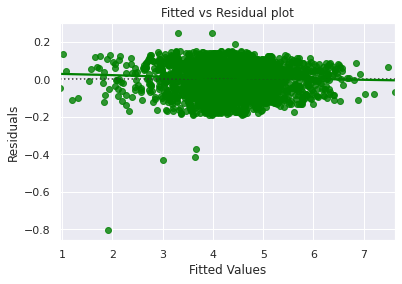

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="green", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

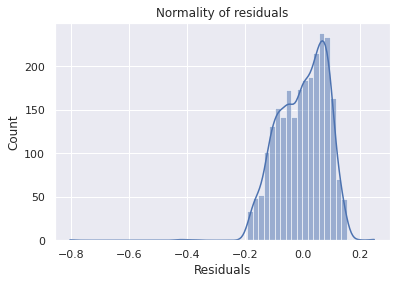

In [ ]:
# histogram plot of the residual
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

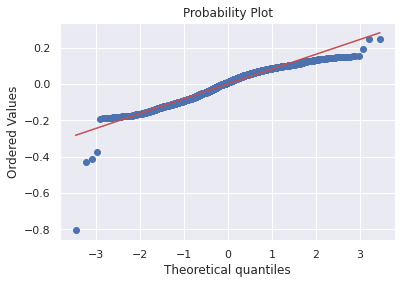

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [ ]:
# Shipiro test for normality
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9563100934028625, pvalue=9.555408204067962e-27)

In [ ]:
# goldfeldquandt test for homoscedasticity

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train4)
lzip(name, test)

[('F statistic', 1.0780199183229566), ('p-value', 0.0928090289866047)]

In [ ]:
# Let us write the equation of linear regression
Equation = "Used Phone Price ="
print(Equation, end=" ")
for i in range(len(X_train4.columns)):
    if i == 0:
        print(np.round(olsmod2.params[i], 4), "+", end=" ")
    elif i != len(X_train4.columns) - 1:
        print(
            "(",
            np.round(olsmod2.params[i], 4),
            ")*(",
            X_train4.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print("(", np.round(olsmod2.params[i], 4), ")*(", X_train4.columns[i], ")")

Used Phone Price = -12.746 + ( 0.0063 )*( release_year ) +  ( -0.0011 )*( days_used ) +  ( 1.0011 )*( new_price_log ) +  ( -0.0373 )*( brand_name_Gionee ) +  ( -0.0108 )*( 4g_yes ) +  ( 0.0242 )*( 5g_yes )


In [ ]:
# predictions on the test set
pred = olsmod2.predict(X_test4)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
2098,3.418382,3.422896
278,5.276430,5.280973
26,5.751493,5.704627
2910,4.499476,4.458647
2631,4.237001,4.165908
1582,4.495132,4.643285
2110,6.067916,5.992102
3160,4.179604,4.096506
2817,4.751605,4.648188
549,3.670970,3.755021


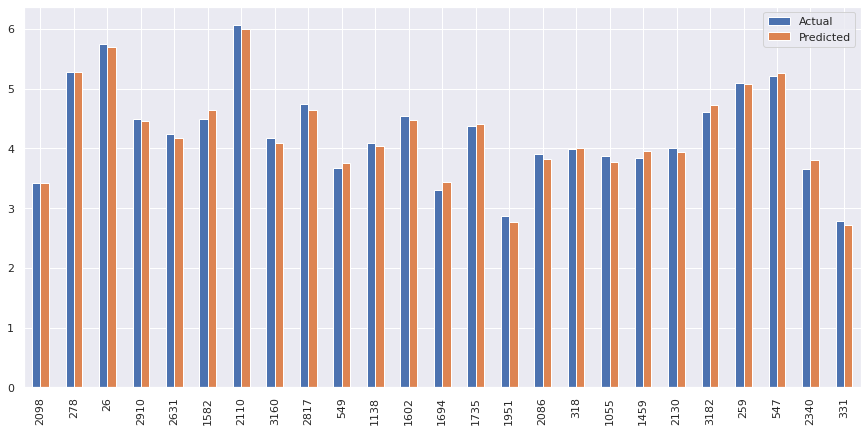

In [ ]:
df2 = df_pred_test.sample(25, random_state=1)
df2.plot(kind="bar", figsize=(15, 7))
plt.show()

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, X_train4, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.08348,0.069271,0.990093,0.990066,1.713701


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, X_test4, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.081662,0.070057,0.989982,0.989916,1.695014


In [ ]:
olsmodel_final = sm.OLS(y_train, X_train4).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 4.151e+04
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:34:11   Log-Likelihood:                 2659.5
No. Observations:                2499   AIC:                            -5305.
Df Residuals:                    2492   BIC:                            -5264.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -12.7460      2.65